## Describing the Feminine (*fragrance*) in Western Culture: an examination of the description of female fragrances in english speaking countries

Paula Gaviria

Winter 2021

**I. Introduction** 

*Scents are often difficult to identify and name, more so when two or more different materials are combined together to create a new smell or accord. One may have in mind the smell of vanilla, but if vanilla is part of a fragrance that uses balsamic and white floral, then it becomes harder to recognize this smell and to describe it. This difficulty in identifying the notes and fragrance families that compose a fragrance, leaves them vulnerable to the influence of language. The consumers need a description, other than the reference of the specific notes, to imagine and better understand the smell of a fragrance. That is why brands rely on adjectives that describe the accords in a way that is not only easier to understand, but that describes the fragrance as a distinctive and desirable smell.* 


*In this project I wish to understand how the adjectives used to describe female fragrances are associated with what is desirable for women and in women in Western culture. What are words that women want to be described as or associated with and therefore identified as a "(adj.) type of women". To do so I will study the accords and adjectives used by popular Western perfume brands to describe fragrances that are for women or for women and men. By doing so I wish to analyze if there is a pattern in the popularity and ranking of certain female fragrances, and if this is related to the distinctive character of the accords or to the description of the scent, or both. I starts by using an unsupervised learning algorithm with two principal components to see if information, other than the accords and description of a scent, such as the longevity and sillage of a perfume, have an effect on its popularity. Afterwards I will analyze the accords and description of several perfumes, and whether these are in some way related to the ranking and popularity of the perfumes. Because there are more than 100 fragrances I will conduct various analysis of the words used for both the accords and the descriptions using Natural Language processing according on different parameters, to see if there is a change in the trends or not. I will also conduct a general analysis of the words most often used to describe female perfumes, and a particular one on the perfume that most women own and compare it to that of the perfume fewer women own, according to the data.*  

**II. Scents and the descriptions of scents as a cultural pattern.** 

*As humans we all smell and have a smell, it is the first sense we develop and a very important one in our evolutionary process. Similar to other animal species through smell we identifying threats, family members and also potential mates. But unlike other animal specied we have invented fragrances by mixing various materials together to create new scents. These scents, unlike our natural scent, also trigger emotions and reactions, but these are meant to be pleasent. What is considered a pleasent smell is usually associated with flowers, but can vary from one place or culture to another. The associations we have about what is a pleasent or desirable smell is transmited within a culture and may differ from one culture to another. To define the concepts associated to a certain pleasent or unpleasent scent we rely on our own sense of smell but also on the description of the scent, whether it is sweet, fresh, spicy, etc.*

*When it comes to contemporary fragrances, perfume brands rely on adjectives that describe the scent of a fragrance in a way that is comprehensive to the consumer, but also as a distinctive and desirable smell. They play with words in a way that describe the name of the perfume and the effect that the accords will have on oneself and the others. The tagline and the scent become a symbol, consumers buy perfumes for the smell and what that specific smell represents in their culture. A women that wishes to be perceived as being more classic or traditional will likely buy a perfume like Chanel No.5  that uses words that indicate tradition such as “timeless” and “eternal” to describe the scent, while a women that perceives herself as being more rebellious may prefer Black Opium by YSL that uses words as “addictive” and “seductively intoxicating”. The words, like the accords, that are used to describe the fragrance are also defined by the cultural context and how women in that specific context are identified. In the Western Culture, specifically in North America and certain European countries, women identify themselves differently than women in other countries. The scents and description of a fragrance that more accurately captures these specific characteristics might be more popular than others. Those scents that are identified as "feminine" or for "women", will likely be different from those that are for "men", since their is a difference in genders in western culture that defines them and "seperates" them, and this pattern is expected to be replicated in scents too.* 

**III. Sign relations of scents and their description.**

*i. **Object**: desirable representation of self.*


*ii.	**Sign-vehicle**: accords of fragrance.* 


*iii. **Interpretant** : a physilogical association to that smell that reflects personal traits or characteristics.* 

*The sign relation of perfumes (sign-vehicle) to its object and interpretant is a **Dicen Indexical Legisign**:  the sign-vehicle (perfume) is connected with its Object (a desirable representation of one self) by an association of general ideas (fresh, classic, sensual, etc.). It usually creates an image in the mind of the person using the perfume, as to those that smell it that tends to produce a general concept of what the individual wearing the perfume not only "smells like" but is trying to signal "being like". The scents of a fragrance and its description act as an index,     they are meant to gives information about its object (the desired self representation) though correlation with what is indicated by the choice of perfume. And we learn what these scents are meant to represent through the description and the images used to advertise that fragrance, amongst other things.* 

**IV. Computational interpretation of scents and their descriptions as a cultural pattern.**

- Load libraries

In [1]:
import librosa
import librosa.display
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import statsmodels.formula.api as smf
from collections import Counter
import nltk
import string
import os
from gensim import corpora, models
import music
import spacy
import wordcloud
import wordtodigits

In [2]:
path = os.getcwd()
perfumes_df = pd.read_csv('perfume.csv')

Source of dataframe [Kaggle](https://www.kaggle.com/sagikeren88/fragrances-and-perfumes?select=perfume.csv)

- Drop columns that are not useful for analysis: `votes`, and others.  

In [3]:
perfumes_df.drop(perfumes_df.iloc[:, 38:62], inplace = True, axis = 1)

In [4]:
perfumes_df.drop(perfumes_df.iloc[:, 44:61], inplace = True, axis = 1)

- Clean `brand` , `accords`, `notes_1`, `notes_2` and `notes_3` from unwanted characters.  

In [5]:
perfumes_df['brand'] = perfumes_df['brand'].astype(str).replace('-',' ',regex=True)

In [6]:
perfumes_df['accords'].fillna('', inplace=True)
perfumes_df['accords'] = perfumes_df['accords'].map(lambda x: x.rstrip('Videos,Pictures'))
perfumes_df['accords'] = perfumes_df['accords'].astype(str).replace(',',' ',regex=True)

In [7]:
perfumes_df['notes_3'].fillna('', inplace=True)

- Change `gender` column into numerical. 

In [8]:
conditions = [
    (perfumes_df['gender'] == 'women'),
    (perfumes_df['gender'] == 'men'),
    (perfumes_df['gender'] == 'unisex')]
choices = [1, 2, 3]
perfumes_df['gender'] = np.select(conditions, choices)

- Drop perfumes that are not frangrances or eau de toilette by looking in `title`. 

In [9]:
perfumes_df = perfumes_df[~perfumes_df['title'].isin(['Hair Mist'])]
perfumes_df = perfumes_df[~perfumes_df['title'].isin(['Hair Perfume'])]
perfumes_df = perfumes_df[~perfumes_df['title'].isin(['Soap'])]
perfumes_df.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,...,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,gender
0,The Spirit of Dubai,Aamal The Spirit of Dubai for women and men,2017,woody earthy animalic amber musky balsam,5.0,3,0,0,0,0,...,1,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,1
1,Ajmal,Aatifa Ajmal for women and men,2014,fresh spicy woody musky rose amb,4.2,10,1,0,0,0,...,1,20,1,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,1
2,Al Jazeera Perfumes,AA Al-Jazeera Perfumes for women and men,0,rose woody musky oud fruity,0.0,0,0,0,0,0,...,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,1
3,Art of Scent Swiss Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,white floral green ozonic fresh animal,0.0,1,0,0,0,0,...,1,1,1,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,1
4,Hamidi Oud Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,woody warm spicy amber balsamic musky,0.0,2,0,0,0,0,...,1,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,1


- Create new column `popularity` according to the number of individuals that `love` the perfume.

In [10]:
def popularity(y):
    if y < 30:
        return 'Very unpopular'
    if 60 > y > 29:
        return 'Unpopular'
    elif y > 80:
        return 'Very popular'
    else:
        return 'Popular'

perfumes_df['popularity'] = perfumes_df['clslove'].map(lambda y: popularity(y))

- Create new column `time_period` according to the `date` the perfume came out.

In [11]:
def time_period(y):
    if y < 2000:
        return 'Older'
    else:
        return 'Newer'

perfumes_df['time_period'] = perfumes_df['date'].map(lambda y: time_period(y))

- Create new column `ranking` according to the `rating_scores` of the perfumes. 

In [12]:
def ranking(y):
    if y < 1.4:
        return 'Worst ranked'
    if 2.5 > y > 1.4:
        return 'Poorly ranked'
    elif y > 3.8:
        return 'Best ranked'
    else:
        return 'Good ranked'

perfumes_df['ranking'] = perfumes_df['rating_score'].map(lambda y: ranking(y))

- Select `brand` I wish to do analysis on and create new data frame of *perfume_brands*.  

In [13]:
perfume_brands = perfumes_df[(perfumes_df['brand'].isin(['Chanel', 'Byredo', 'Gucci','Tom Ford', 'Lancome', 'Valentino',
                                                 'Christian Dior', 'Giorgio Armani', 'Paco Rabanne','Yves Saint Laurent',
                                                 'Acqua di Parma', 'Jo Malone London', 'Maison Francis Kurkdjian', 
                                                 'Jean Paul Gaultier', 'Givenchy', 'Calvin Klein', 'Davidoff', 
                                                 'Thierry Mugler', 'Chloe', 'Marc Jacobs', 'Carolina Herrera', 'Burberry',
                                                 'Lanvin','Bvlgari', 'Mugler', 'Dolce Gabbana', 'Chlo-', 'Versace', 
                                                 'Herm s', 'Est e Lauder', 'Guerlain', 'Cacharel', 'Loewe', 'Annick Goutal',
                                                         'Viktor Rolf'
                                                ]))]
perfume_brands

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,...,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,gender,popularity,time_period,ranking
12,Christian Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,2005,fruity patchouli woody earthy sw,4.00,2386,22,25,113,141,...,1529.0,0.0,0.0,Top1Strawberry,Middle0Jasmine,Middle1Rose,1,Very popular,Newer,Best ranked
14,Yves Saint Laurent,Mon Paris Yves Saint Laurent for women,2016,fruity sweet white floral patchoul,3.51,1928,36,48,200,91,...,1151.0,0.0,0.0,Top1Raspberry,Top2Pear,Top3Calabrian bergamot,1,Very popular,Newer,Good ranked
21,Valentino,Valentina Pink Valentino for women,2011,fruity sweet rose musky floral,4.02,413,7,21,46,27,...,293.0,0.0,0.0,Top1Blackberry,Top2Musk,Middle0May Rose,1,Very popular,Newer,Best ranked
22,Burberry,Burberry Her Burberry for women,2018,fruity sweet woody musky powdery,3.36,501,12,10,25,54,...,206.0,0.0,0.0,Top1Strawberry,Top2Sour Cherry,Top3Blackberry,1,Popular,Newer,Good ranked
34,Marc Jacobs,Daisy Eau So Fresh Sunshine Marc Jacobs for women,2007,fruity sweet citrus rose floral,4.18,257,12,15,20,2,...,164.0,0.0,0.0,Top1Apple Blossom,Top2Pink Grapefruit,Middle0Jasmine,1,Very popular,Newer,Best ranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51111,Lancome,2000 et Une Nuit Lancome for women,1999,rose aldehydic musky woody fresh spicy,0.00,0,0,0,0,0,...,0.0,1.0,0.0,Top1Rose,Top2Pepper,Top3Musk,1,Very unpopular,Older,Worst ranked
51157,Carolina Herrera,212 NYC Body Spray Carolina Herrera for women,2012,citrus white floral floral powdery musky,3.95,22,0,0,2,3,...,13.0,0.0,0.0,Top1Mandarin Orange,Top2Bergamot,Top3Pink Grapefruit,1,Unpopular,Newer,Best ranked
51158,Carolina Herrera,212 NYC Men Pills Carolina Herrera for men,2016,woody aromatic green fresh spicy balsam,4.25,18,0,1,2,4,...,9.0,0.0,0.0,Top1Petitgrain,Top2Lavender,Top3Green Notes,0,Popular,Newer,Best ranked
51173,Carolina Herrera,212 Splash for Women Carolina Herrera for women,2007,citrus woody fresh floral rose fruity,3.83,29,0,0,2,0,...,14.0,0.0,0.0,Top1Grapefruit,Top2Bergamot,Middle0Peony,1,Unpopular,Newer,Best ranked


In [14]:
perfume_unsupervised = perfume_brands

In [15]:
perfume_unsupervised.drop(perfume_unsupervised[perfume_unsupervised['gender'] == 2].index, inplace = True) 
perfume_unsupervised.drop(perfume_unsupervised[perfume_unsupervised['gender'] == 0].index, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


- Select only numerical values to perform unsupervised learning. 

In [16]:
features = perfume_unsupervised.columns[perfume_unsupervised.dtypes != "object"].values

- Create matrix for unsupervised clustering.

In [17]:
x = perfume_unsupervised.loc[:, features].values
y = perfume_unsupervised.loc[:, ['popularity']].values

x = StandardScaler().fit_transform(x)

In [18]:
y_popularity = y.ravel()
perfumes_popularity = np.array(y_popularity)
perfumes_popularity

array(['Very popular', 'Very popular', 'Very popular', ...,
       'Very unpopular', 'Unpopular', 'Unpopular'], dtype=object)

In [19]:
label_encoder = LabelEncoder()
popularity_labels = label_encoder.fit_transform(perfumes_popularity)
popularity_labels[0:]

array([2, 2, 2, ..., 3, 1, 1])

- Select number of clusters by number of different groups.

In [20]:
label_encoder.classes_
n_clusters = len(label_encoder.classes_)

In [21]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [22]:
clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=n_clusters,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ]
)

In [23]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [24]:
pipe.fit(x)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=4, n_init=50, n_jobs=None,
                                         precomp

In [25]:
preprocessed_data = pipe["preprocessor"].transform(x)
predicted_labels = pipe["clusterer"]["kmeans"].labels_
silhouette_score(preprocessed_data, predicted_labels)

0.39447476240705803

In [26]:
true_label = label_encoder.inverse_transform(popularity_labels)
true_label

array(['Very popular', 'Very popular', 'Very popular', ...,
       'Very unpopular', 'Unpopular', 'Unpopular'], dtype=object)

In [27]:
adjusted_rand_score(popularity_labels, predicted_labels)

0.08507923072874862

In [28]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(x),
    columns=["component_1", "component_2"],
)

In [29]:
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(popularity_labels)

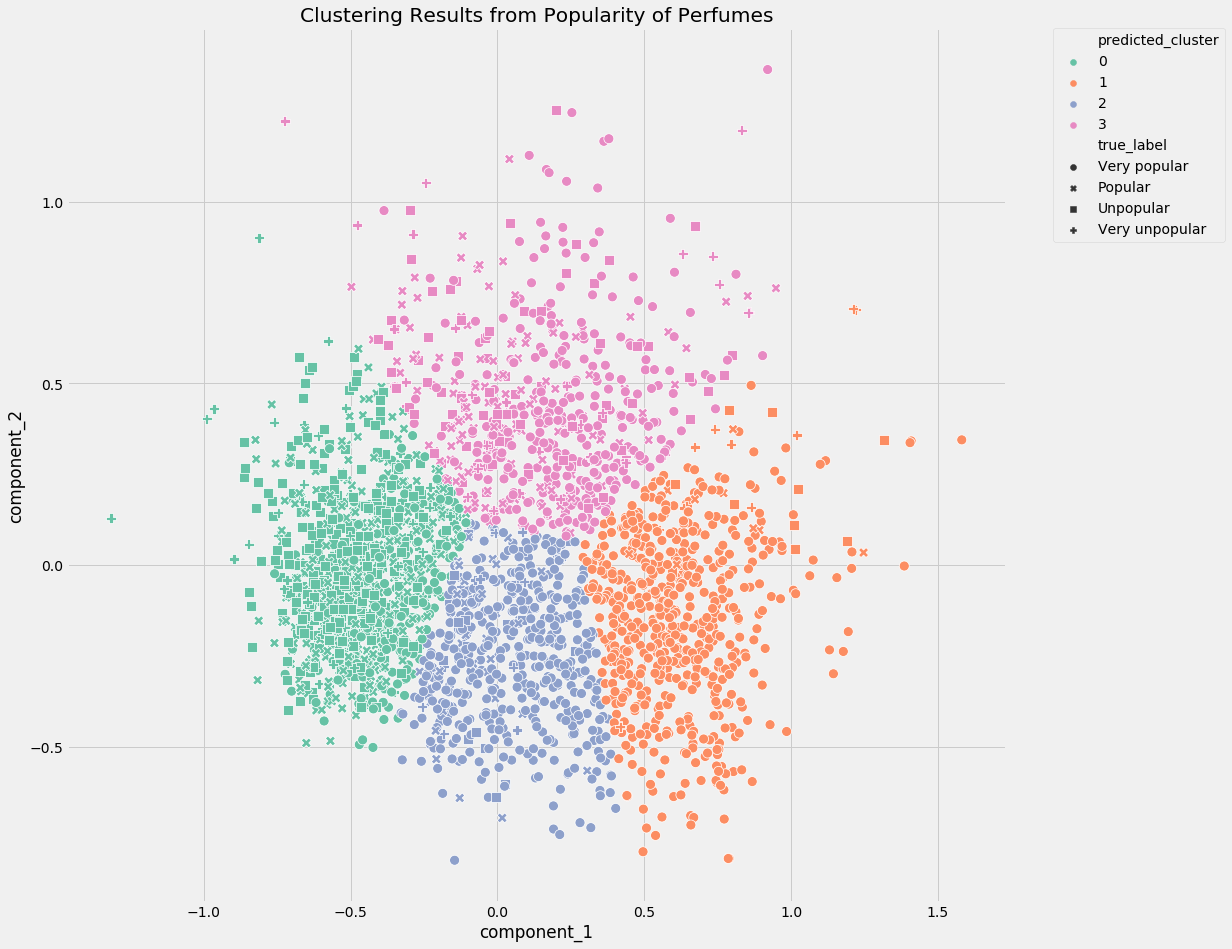

In [30]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 15))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=100,
    data=pcadf,
    hue= 'predicted_cluster',
    style= 'true_label' ,
    palette="Set2",
)
scat.set_title(
    "Clustering Results from Popularity of Perfumes"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

*0 = very unpopular, 1 = unpopular, 2 = popular, 3 = very popular*

Sources: https://realpython.com/k-means-clustering-python/

- Separate `accords` of perfumes according to `gender` and transform to text. 

In [56]:
accords_woman = perfume_brands[perfume_brands['gender'] == 1]['accords']
accords_man = perfume_brands[perfume_brands['gender'] == 3]['accords']

In [57]:
text_woman = ''.join(accords_woman)
text_man = ''.join(accords_man)

- Functions from class to identify popular lemmas.

In [33]:
stop = nltk.corpus.stopwords.words('english') + list(string.punctuation) + ['parfum',"’","toilette",'Chanel', 'Byredo', 'Gucci','Tom Ford', 'Lancome', 'Valentino',
                                                 'Christian Dior', 'Giorgio Armani', 'Paco Rabanne','Yves Saint Laurent',
                                                 'Acqua di Parma', 'Jo Malone London', 'Maison Francis Kurkdjian', 
                                                 'Jean Paul Gaultier', 'Givenchy', 'Calvin Klein', 'Davidoff', 
                                                 'Thierry Mugler', 'Chloe', 'Marc Jacobs', 'Carolina Herrera', 'Burberry',
                                                 'Lanvin','Bvlgari', 'Mugler', 'Dolce Gabbana', 'Chlo-', 'Versace', 
                                                 'Hermès', 'Est e Lauder', 'Guerlain', 'Cacharel', 'Loewe', 'Annick Goutal',
                                                 'Viktor Rolf','notes','scent','is',"n't", "the", "and", "so", "According", 'a',
                                                'fragrance', 'fragance','perfume','parfume','de','eau',"'s","``", 
                                                    'thanks','.','choi',",","'","`","´",'"',"guerlain","base","accord"]

def get_lemmas(text):
    
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]
    return lemmas

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": nltk.corpus.wordnet.ADJ,
                "N": nltk.corpus.wordnet.NOUN,
                "V": nltk.corpus.wordnet.VERB,
                "R": nltk.corpus.wordnet.ADV}

    return tag_dict.get(tag, nltk.corpus.wordnet.NOUN)

def plot_top_lemmas(text, data_description, n=20 ):
    
    tokens = [i for i in nltk.word_tokenize(text.lower()) if i not in stop]
    lemmas = [nltk.stem.WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in tokens]

    nltk.FreqDist(lemmas).plot(n, title='Top 20 Lemmas Overall for ' + data_description);
    return

- Lemmas for women and men perfumes

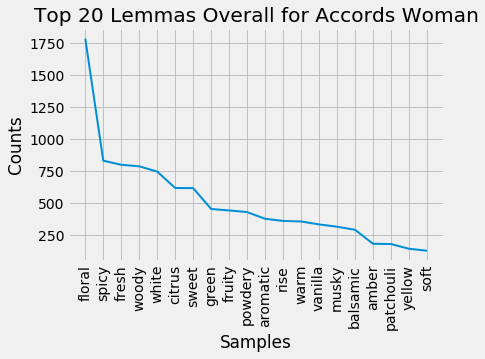

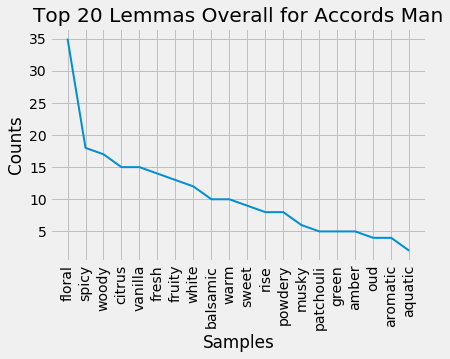

In [58]:
plot_top_lemmas(text_woman, "Accords Woman", n=20)
plot_top_lemmas(text_man, "Accords Man", n=20)

*We see that both the most popular and least popular fragrances have similar top accords "floral", "spicy" and "woody", there seems to be no difference in the main accords and the popularity of a fragrance. Where we see more difference is in those accords that are not the top 10, these seem to have more variety. It seems that it is the mix of accords and not a specific accord which makes a perfume more or less popular."*

- Read csv. for perfume descriptions.

In [35]:
perfumes_descriptions = pd.read_csv('perfumes_descriptions_101.csv')
perfumes_descriptions.head()

,title,description,perfume_gender
0,Mon Paris Gold Attraction Edition Yves Saint L...,Your precious and incomparable love will shine...,Women
1,Myrrhe Carmin Givenchy for women and men,A spicy and opulent Myrrhe for a daring and di...,Unisex
2,Leather Eau de Parfum Acqua di Parma for women...,An intense and charismatic fragrance inspired ...,Unisex
3,Oud Eau de Parfum Acqua di Parma for women and...,"Intense, vigorous and precious, a fragrance th...",Unisex
4,Fol Arôme Guerlain for women,An irreverent and unexpected fragrance that li...,Women


- Merge the two datasets on `title` of perfume.

In [36]:
perfume_descriptions = pd.merge(perfumes_df, perfumes_descriptions, on=["title"])

- Separate `accords` of perfumes according to `popularity` and transform to text to creat Lemma plots.  

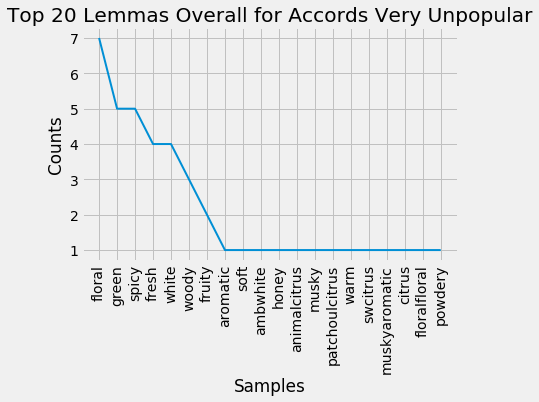

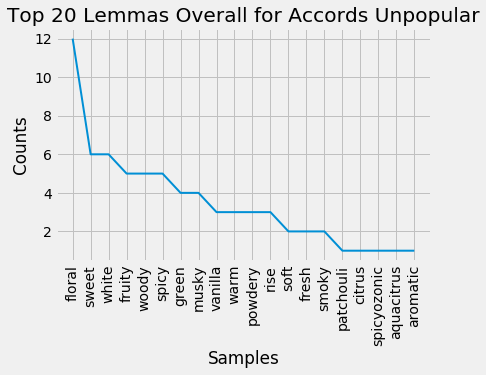

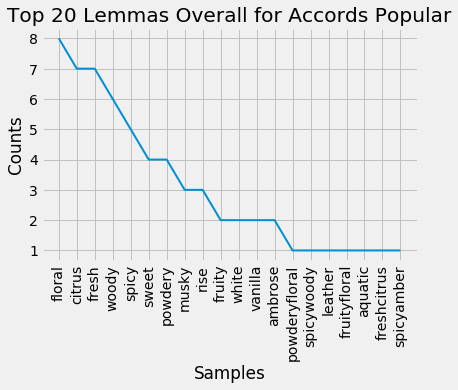

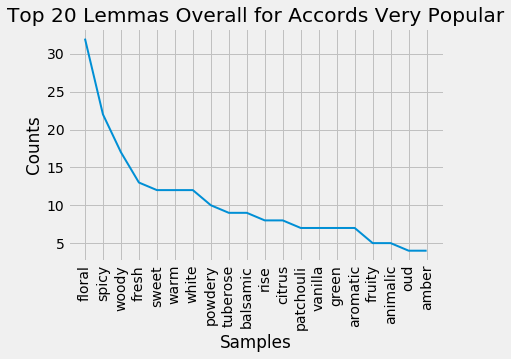

In [37]:
accords_v_unpopular = perfume_descriptions[perfume_descriptions['popularity'] =='Very unpopular']['accords']
accords_unpopular = perfume_descriptions[perfume_descriptions['popularity'] =='Unpopular']['accords']
accords_popular = perfume_descriptions[perfume_descriptions['popularity'] =='Popular']['accords']
accords_v_popular = perfume_descriptions[perfume_descriptions['popularity'] =='Very popular']['accords']
text_v_unp = ''.join(accords_v_unpopular)
text_unp = ''.join(accords_unpopular)
text_pop = ''.join(accords_popular)
text_v_pop = ''.join(accords_v_popular)
plot_top_lemmas(text_v_unp, "Accords Very Unpopular", n=20)
plot_top_lemmas(text_unp, "Accords Unpopular", n=20)
plot_top_lemmas(text_pop, "Accords Popular", n=20)
plot_top_lemmas(text_v_pop, "Accords Very Popular", n=20)

- Separate `description` of perfumes according to `popularity` and transform to text. 

In [38]:
desc_v_unpopular = perfume_descriptions[perfume_descriptions['popularity'] =='Very unpopular']['description']
desc_unpopular = perfume_descriptions[perfume_descriptions['popularity'] =='Unpopular']['description']
desc_popular = perfume_descriptions[perfume_descriptions['popularity'] =='Popular']['description']
desc_v_popular = perfume_descriptions[perfume_descriptions['popularity'] =='Very popular']['description']

In [39]:
text_desc_v_unp = ''.join(desc_v_unpopular)
text_desc_unp = ''.join(desc_unpopular)
text_desc_pop = ''.join(desc_popular)
text_desc_v_pop = ''.join(desc_v_popular)

- Separate `description` of perfumes according to `ranking` and transform to text. 

In [40]:
desc_w_rank = perfume_descriptions[perfume_descriptions['ranking'] =='Worst ranked']['description']
desc_p_rank = perfume_descriptions[perfume_descriptions['ranking'] =='Poorly ranked']['description']
desc_g_rank = perfume_descriptions[perfume_descriptions['ranking'] =='Good ranked']['description']
desc_b_rank = perfume_descriptions[perfume_descriptions['ranking'] =='Best ranked']['description']
description = perfume_descriptions['description']
accords = perfume_brands['accords']

In [41]:
text_desc_w_rank = ''.join(desc_w_rank)
text_desc_p_rank = ''.join(desc_p_rank)
text_desc_g_rank = ''.join(desc_g_rank)
text_desc_b_rank = ''.join(desc_b_rank)
text_description = ''.join(description)
text_accords = ''.join(accords)

- Plot words mostly used according to `popularity`.

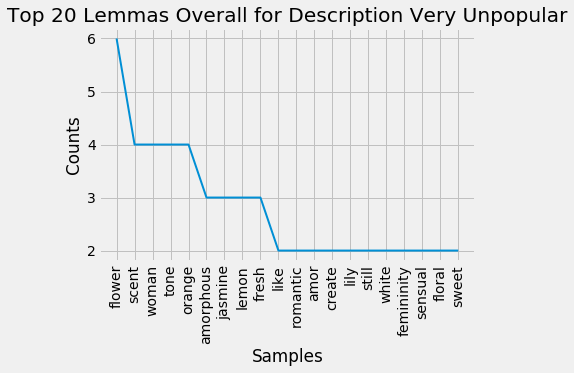

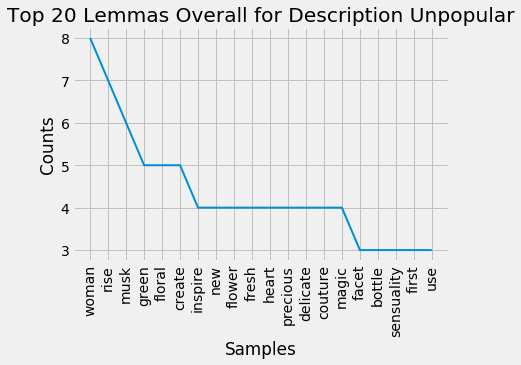

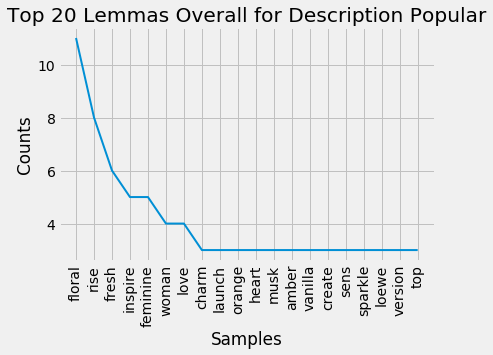

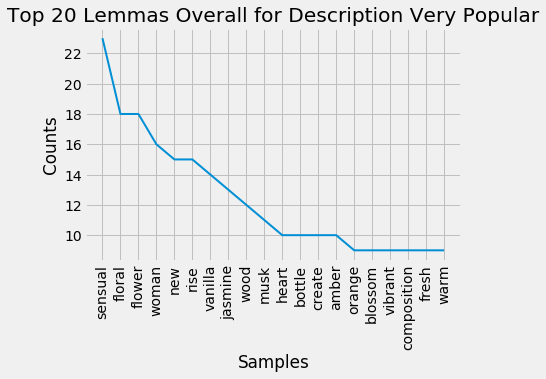

In [42]:
plot_top_lemmas(text_desc_v_unp, "Description Very Unpopular", n=20)
plot_top_lemmas(text_desc_unp, "Description Unpopular", n=20)
plot_top_lemmas(text_desc_pop, "Description Popular", n=20)
plot_top_lemmas(text_desc_v_pop, "Description Very Popular", n=20)

- Plot words mostly used according to `ranking`.

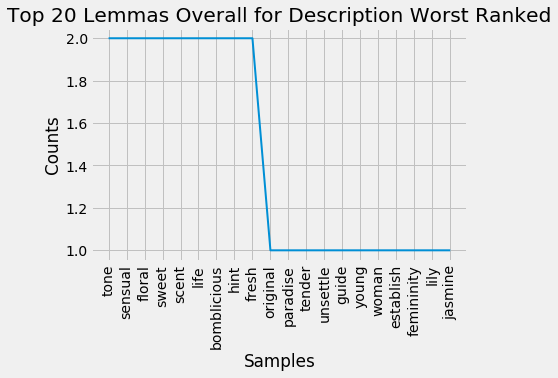

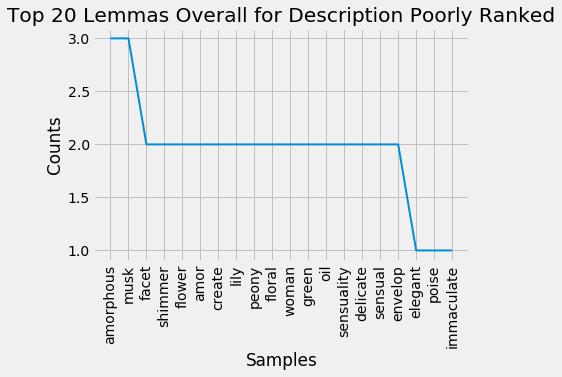

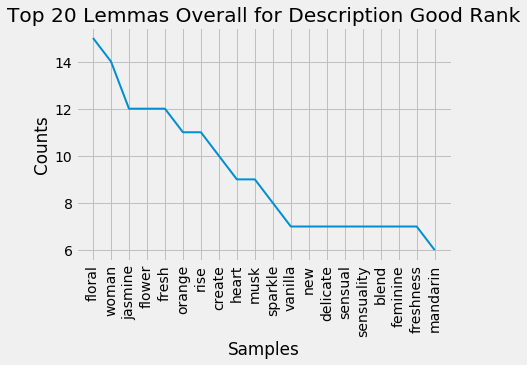

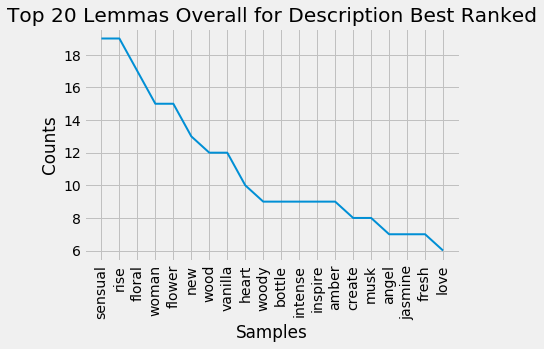

In [43]:
plot_top_lemmas(text_desc_w_rank, "Description Worst Ranked", n=20)
plot_top_lemmas(text_desc_p_rank, "Description Poorly Ranked", n=20)
plot_top_lemmas(text_desc_g_rank, "Description Good Rank", n=20)
plot_top_lemmas(text_desc_b_rank, "Description Best Ranked", n=20)

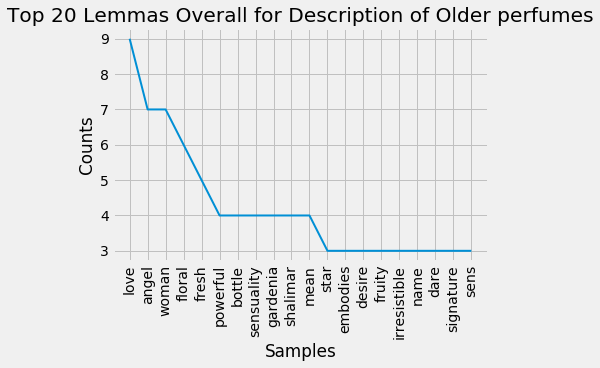

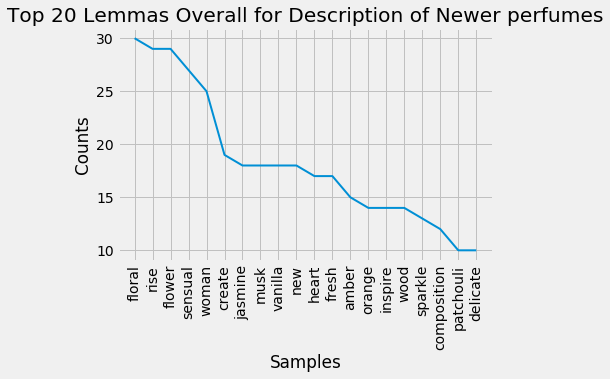

In [44]:
description_older = perfume_descriptions[perfume_descriptions['time_period'] =='Older']['description']
description_newer = perfume_descriptions[perfume_descriptions['time_period'] =='Newer']['description']
text_older = ''.join(description_older)
text_newer = ''.join(description_newer)
plot_top_lemmas(text_older, "Description of Older perfumes", n=20)
plot_top_lemmas(text_newer, "Description of Newer perfumes", n=20)

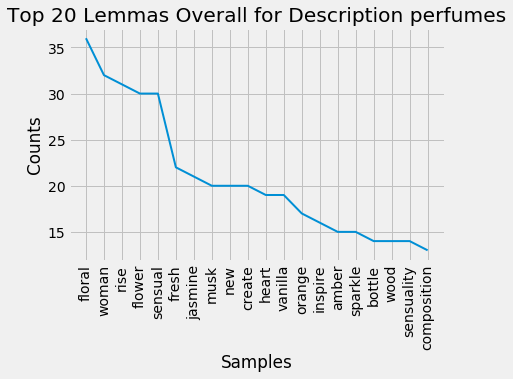

In [45]:
plot_top_lemmas(text_description, "Description perfumes", n=20)

- Identify the most popular fragrances owned by women `Ihaveit`, and the most desired `Iwantit`. Identify the least popular fragrance `clslove` that has the lowest number of votes, and `clsdislike` with the largest number of votes. 

In [46]:
perfume_descriptions.loc[perfume_descriptions['Ihaveit'].idxmax()]

brand                                                           Dolce Gabbana
title                                      Light Blue Dolce&Gabbana for women
date                                                                     2001
accords                                       citrus woody green fresh fruity
rating_score                                                             3.64
votes                                                                   10008
longevity_poor                                                            169
longevity_weak                                                            304
longevity_moderate                                                        719
longevity_long                                                            278
longevity_very_long                                                       105
sillage_soft                                                              409
sillage_moderate                                                

In [47]:
perfume_descriptions.loc[perfume_descriptions['Iwantit'].idxmax()]

brand                                                            Paco Rabanne
title                                Erotic Me Paco Rabanne for women and men
date                                                                     2019
accords                                       fruity floral milky sweet leath
rating_score                                                                5
votes                                                                       2
longevity_poor                                                              0
longevity_weak                                                              0
longevity_moderate                                                          0
longevity_long                                                              4
longevity_very_long                                                         1
sillage_soft                                                                1
sillage_moderate                                                

In [48]:
perfume_descriptions.loc[perfume_descriptions['clslove'].idxmin()]

brand                                                                Cacharel
title                               Amor Amor by Lili Choi Cacharel for women
date                                                                     2011
accords                                  aromatic fruity green soft spicy amb
rating_score                                                             2.29
votes                                                                      12
longevity_poor                                                              0
longevity_weak                                                              0
longevity_moderate                                                          1
longevity_long                                                              0
longevity_very_long                                                         1
sillage_soft                                                                0
sillage_moderate                                                

In [49]:
perfume_descriptions.loc[perfume_descriptions['clsdislike'].idxmax()]

brand                                                                  Mugler
title                                  Angel Immaculate Star Mugler for women
date                                                                     2015
accords                      patchouli vanilla citrus fruity sweet warm spicy
rating_score                                                             2.33
votes                                                                       8
longevity_poor                                                              1
longevity_weak                                                              1
longevity_moderate                                                          0
longevity_long                                                              0
longevity_very_long                                                         1
sillage_soft                                                                0
sillage_moderate                                                

In [50]:
description_most_popular = perfume_descriptions[perfume_descriptions['title'] =='Light Blue Dolce&Gabbana for women']['description']
description_most_wanted = perfume_descriptions[perfume_descriptions['title'] == 'Erotic Me Paco Rabanne for women and men']['description']
description_least_popular = perfume_descriptions[perfume_descriptions['title'] =='Amor Amor by Lili Choi Cacharel for women']['description']
description_ambiguous = perfume_descriptions[perfume_descriptions['title'] =='Angel Immaculate Star Mugler for women']['description']

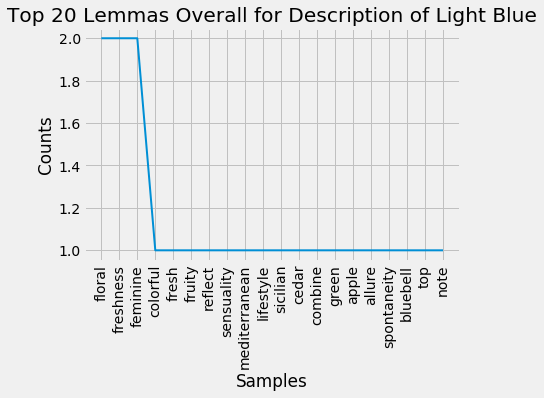

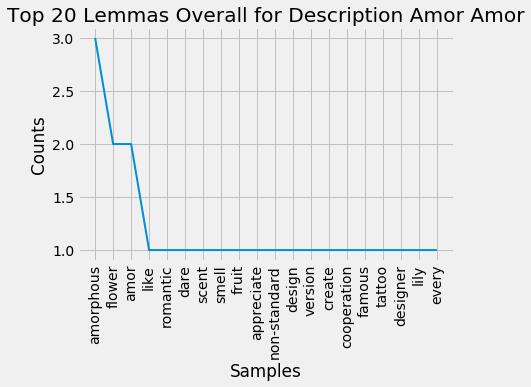

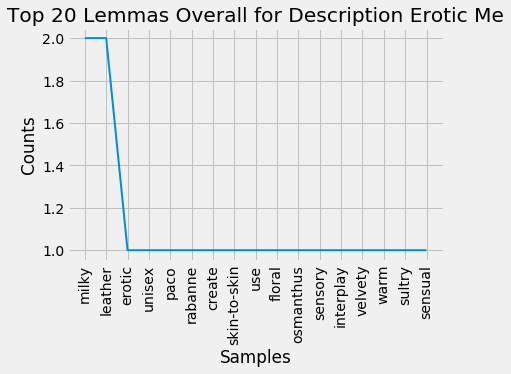

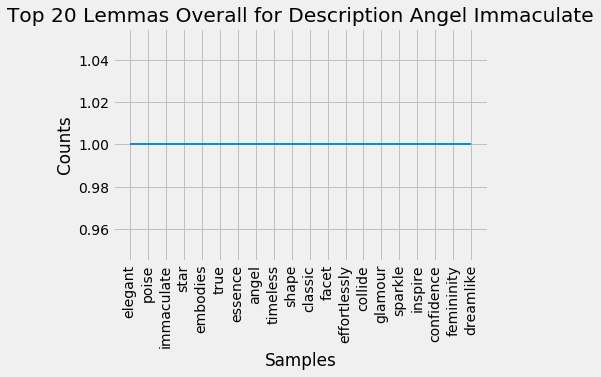

In [51]:
text_lightblue = ''.join(description_most_popular)
text_prive = ''.join(description_least_popular)
text_erotic_me = ''.join(description_most_wanted)
text_angel_star = ''.join(description_ambiguous)
plot_top_lemmas(text_lightblue, "Description of Light Blue", n=20)
plot_top_lemmas(text_prive, "Description Amor Amor", n=20)
plot_top_lemmas(text_erotic_me, "Description Erotic Me", n=20)
plot_top_lemmas(text_angel_star, "Description Angel Immaculate", n=20)

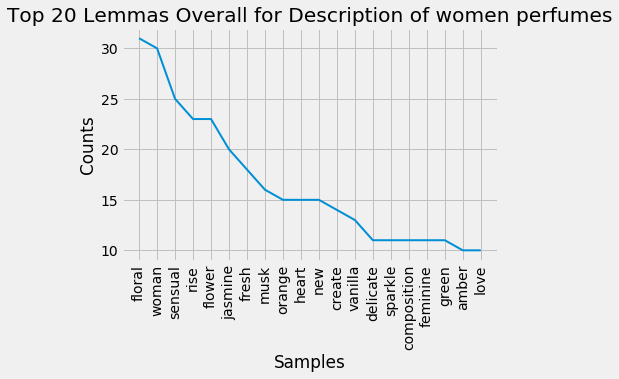

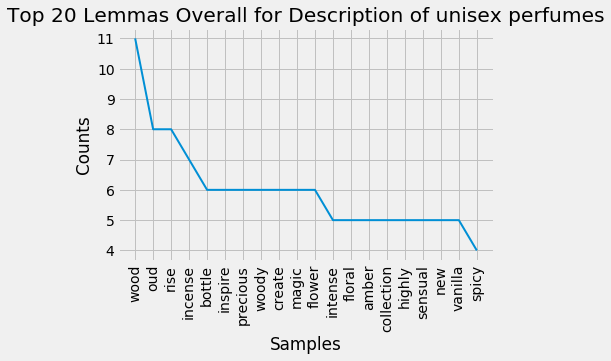

In [52]:
description_women = perfume_descriptions[perfume_descriptions['perfume_gender'] =='Women']['description']
description_unisex = perfume_descriptions[perfume_descriptions['perfume_gender'] =='Unisex']['description']
text_women = ''.join(description_women)
text_unisex = ''.join(description_unisex)
plot_top_lemmas(text_women, "Description of women perfumes", n=20)
plot_top_lemmas(text_unisex, "Description of unisex perfumes", n=20)

**V. Interpretation of the identification of scents and scent description as a cultural pattern.**

*To identify the replication of the female gender in those scents that are "feminine" as opposed to those that are “masculine” I conducted different analysis that focused on the accords and the descriptions of various popular perfumes. The results for each are explained in detail below. With this cultural analysis my objective was to evaluate if there was a pattern, or not, in the words used to describe the perfumes and how these related to the definitions of what women are like, or should be like, according to our cultural context. “Gender identity reflects people's understanding of themselves in terms of cultural definitions of female and male.” (Wood and Eagly, 2015). Scents, being harder to identify than other sensory perceptions, use labels or descriptions. These descriptions and labels used have been proven to affect perceived gender attributes of an odor (Zellner et. al, 2017).*  

*I chose perfumes because smell is a powerful sense and humans use it, many times not consciously, to understand others and their surroundings. As Du Gay et al. (2013) say "belonging to a culture provides us to access to...shared frameworks...of meaning which we use to place and understand things, to make sense of the world, to formulate ideas and to communicate or exchange ideas and meanings about it".In a similar way we use perfumes as a way to reflect certain personal traits that we believe are attractive to the other, and to cover our own smell. The accords used in female fragrances are supposed to smell “feminine” for women to wear them but also to attract men, they are a signal of what defines you as a women. But the accords are not enough to, we need language to understand what those accords are meant to signal. By using both the accords and the description I can interpret what smells and the language used to describe what is supposed to be feminine in our culture in comparison to what is masculine.  “Most perfumes  are  categorized  as  either  feminine  or  masculine… and gender is one main feature people use while judging and evaluating the perceived odor of fragrances.” (Lindqvist, 2012).*


*Fragrances are just a part of the replication of a much larger social construct that defines various cultural patterns, patriarchy. “Gender inequality is perpetuated by cultural norms and practices that normalize women's lower social power… and vary in subtle but important ways within communities and across time” (Marcus and Harper, 2015). Patriarchy uses linguistic practices as cultural definitions of social life (Hall and Bucholtz, 1995). Language and the use of language through definitions of what it means to be part of a group, male or female, is replicated in many contexts. “This ability to make others accept and enact one’s representation of the world is another, powerful aspect of domination…a matter of cultural content.” (Hall and Bucholtz, 1995). Therefore this study is relevant to most cultural groups, no matter if they identify as westerners or not, to identify and challenge the dominating discourse.* 


*When I used the unsupervised learning algorithm with two principal components and k-mean clusters I found that there were no clear differences between the popularity of the scents, according to the ranking I created, when the accords and description of the scents are used. It seems that things like the longevity and silage, whether it is a night or day perfume, and how liked or disliked it is by women and men of different ages does not have an identifiable effect on how popular it is in general. This supports my hypothesis that female perfumes, in general, are popular because of the accords used and how/what these accords are supposed to signal to others through their smell but also through their description. When we look at perfume description we see no mention of the silage “the trail of scent left behind by a perfume”, the longevity or the specific season. The descriptions, as we see in the plots for the lemmas, are related to the notes that compose the perfume and adjectives that explain what these notes are supposed to signal to others. Such as “fresh” for a citrusy perfume or “feminine” to describe one that is more floral.* 


*The results from the unsupervised model led me to believe that the popularity of the fragrances is indeed related the accords, but most importantly to the adjectives used to describe those accords. In the plots for the “Top 20 Lemmas Overall for Accords” where I identify the accords that are used the most in the fragrances that compose each popularity category we see that top 5 accords are the same for all categories. Both the most popular and least popular fragrances have similar top accords "floral", "spicy", “fresh”, and "woody", there seems to be no difference in the main accords and the popularity of a fragrance, floral being the most popular of all. This is expected since flowers are the most common ingredient in perfumes, and that is where the word, in Latin, comes from “a sweetsmelling fluid containing the essence of flowers and other substances”. (). This seems to indicate that it is the mix of accords and not a specific accord which makes a perfume more or less popular, and the description of the accords used.* 
*To evaluate the accords used in fragrances that are for women and those for men I use NLP to count the number of accords in all the perfumes to identify those that are most common. In the graphs we see that the accords do vary. For women the most common accord is “floral” whereas for men it is “spicy”, the overall use of accords also changes, accords such as “balsamic”, “aromatic” and “warm” are much more common in male perfumes, we also see “herbal” and “leather”, accords that are not common in female perfumes.* 


*To evaluate the cultural pattern in the words used for the description of the 100 selected female and unisex perfumes I conduct, once again, Natural Language Processing to identify and count the most common words used for each popularity category. In “Top 20 Lemmas Overall for Description” we start to see a variety of words used, here we can identify a pattern. The adjectives used for the **very popular** fragrances are “sensual”, “floral”, “new” and “vibrant”, among others. We also see that mentioning the bottle, its design, and the accords is common when describing the perfume. Even though there are similarities between the **very popular** and **popular** perfumes, we see that unlike those that are less popular do not use the adjectives “sensual” and instead use “feminine”. The adjectives used for **very unpopular** seem to be the opposite of **very popular**, we see that “sensual”, “feminine” and “floral” are less used and adjectives such as “amorphous” and “romantic” are more common. For **unpopular** we also identify a different trend, adjectives such as “delicate” and “precious” seem to be common, and we do not see them in any other category.* 


*The results for `ranking` do not seem to be as significant since the number of perfumes that are **worst ranked** when compared to the **best ranked** seem to be unbalanced. What we can interpret form the **best ranked** is that similar to the **very popular** perfumes they use the adjectives “sensual” and “new” and mention the design of the bottle. When comparing the description of **older** and **newer** perfumes we also see that the data is unbalanced. For older perfumes we see that they use adjectives such as “love”, “powerful” and “fresh”, and they describe the design of the bottle. Whereas the newer perfumes, which are most of the perfumes chosen in this specific sample, use adjectives like “sensual”, “create” and “new”. To have a better comparison between these groups it would be recommendable to include more **older perfumes** and perfumes with lower `ranking` in the sample.* 


*To identify those words that are used to describe female perfumes in general, I identified the top 20 lemmas for all the perfumes in the sample. Here we see that, similar to the `accords`, the word “floral” is the one that is used the most to describe perfumes. We also see that the adjectives “sensual/sensuality”, “fresh”, “new” and “inspire” are very common. In the final part of the analysis of the descriptions I compared those words used for the perfume that is owned by most women “Dolce & Gabbana Light Blue”, and the one that is most wanted “Erotic Me by Paco Rabanne”, to the perfume that is least loved “Amor Amor by Lili Choi Cacharel for women” and the perfume for which there are ambiguous results “Angel Immaculate Star Mugler for women”. Once more we see a pattern in the words used to describe **very popular** perfumes “floral”, “fresh” and “sensuality”. And for “Amor Amor” we see that the most common word is “amorphous”, an adjective commonly used to describe **very unpopular** perfumes. For the **most wanted** we identify adjectives that were not common in any other category such as “erotic”, “unisex” and “sultry”, we also see accords that were not as popular like “milky”, “leather” and “osmanthus”. The words used to describe “Angel Immaculate Star Mugler for women” are adjectives that make allusion to being “classic” such as “elegant”, “poised” and “timeless”, different from the other three perfumes there seems no mention of the accords in the description.*


*The final comparison, between the words used to describe **Unisex** and **Women** fragrances also demonstrates differences in the adjectives and accords used to describe them. For **Women** perfumes we see the same adjectives used before, “sensual”, “floral”, “new”, “feminine” and “delicate”, and the same popular accords. Whereas the fragrances that are for both men and women use adjectives that are not related to femininity as much, they mention “sensual” and “new” but seem to rely mostly on the accords to describe the scent. The accords are also different form the ones mostly used for women fragrances, here we see that “wood”, “oud” and “incense” are more common than “floral” and “citrus”.* 


*An alternative interpretation to the use of accords and descriptions used for female fragrances, as opposed to unisex or male fragrances could be explained from an evolutionary or biological perspective. Maybe some scents are identified as “feminine” while others as “masculine” as part of our evolutionary process and that is why the “noses” behind the creations of perfumes still use certain accords for women and others for men. This would be very difficult, if not impossible, to measure using computational programs, and might be biased as well. Since perfumes are a human creation and so is gender identity it would be difficult to identify what is really biological and what is learned in the cultural context. In this sense there would not be a need for the descriptions, the accords by themselves would be powerful enough to signal what is feminine or masculine and attract others. As Speed and Majid (2019) explain “one consequence of the difficulty identifying odors (at least in the West) is that odor perception can easily be affected by contextual information… therefore odors can be influenced by visual and linguistic cues – so-called “olfactory illusions.” That is why using the accords and descriptions of common perfumes is a good way to identify the cues that are supposed to define  “feminine” and “masculine” odors in western cultures. As Latour (1990) explains“whenever we discover a stable social relation, it is the introduction of some non-humans that accounts for this relative durability. The most productive way to create new narratives has been to follow the development of and innovation.” Maybe by innovating and changing the labels used in perfumes we can change discourse around gender.* 



**VI. Conclusion**

*Overall we see that the accords used for female fragrances do not vary very much and that the most popular accords are those that are the floral and fresh notes. The descriptions of the perfumes are also quite similar and they usually make references to femininity. The adjectives used are a symbol of what has been identified to be feminine: sensual, delicate, sweet and clean (fresh). Whereas the accords used to in perfumes that are unisex are woody and oriental notes. It seems that a smell there are smells that are only meant for women and that these notes can not be used in fragrances that are also used by men since they indicate femininity and sensuality. Those scents that are unisex are less floral and more woody or “classic”, they can also be sensual but they are not delicate or sweet like the perfumes made only for women. This differences in scents seem to indicate that there are smells that are only feminine and others that can be more “universal” because they are not feminine. Using accords that are more common in fragrances for men might indicate that it is accepted for women to smell like men but not for men to smell like women. These definitions of gender and the “differences” established between the genders is a cultural pattern that is replicated in the scents and descriptions used in perfumes, but that is a common pattern in western culture and in other cultures as well. We see it in the older and newer perfumes, no matter the time period the words used to describe the perfumes are still stereotypical. We see these gender stereotypes not only in the scents and descriptions of perfumes, we see it in fashion, movies, school, in the workplace, we see it everywhere. Women can be masculine, it is alright for a woman to smell, dress, and act like a man, but it is unacceptable for men to dress, act and smell like a woman. It is important to identify the language we use to describe the genders, not only in the advertisements for perfumes, but in general, to change the negative connotations associated with being a woman, and also to rewrite what being a woman is. Are we women really like the perfumes we use? Do we all aspire to be sensual, delicate, sweet and clean? Or have we been indoctrinated to believe that this is what we desire? I believe it is time that we stop using the adjectives that have been used to describe femininity and start using adjectives that describe each one of us, whether we identify as women or not. Because every woman is a different woman regardless of the fragrance it wears.*


**VII. Bibliography**

Du Gay et al. Doing Cultural Studies. (2013). 

Hall, K., Bucholtz, M. Gender articulated: language and the socially constructed self. Routledge(1995). 


Latour. Technology is society made durable. Extract. (1990) 

Lindqvist, A. How is Commercial Gender Categorization of Perfumes Related to Consumers Preference of Fragrances?, Procedia - Social and Behavioral Sciences, Volume 65, (2012)Pages 370-374, ISSN 1877-0428, https://doi.org/10.1016/j.sbspro.2012.11.136.

R. Marcus, C. Harper How do gender norms change? Knowledge to action resource series. UKAID. Knowledge to action resource series, Overseas Development Institute (ODI)(2015)

Speed, L.J., Majid, A. Linguistic features of fragrances: The role of grammatical gender and gender associations. Atten Percept Psychophys 81, 2063–2077 (2019). https://doi.org/10.3758/s13414-019-01729-0

Wood, W., Eagly, A.H. Two Traditions of Research on Gender Identity. Sex Roles 73, 461–473 (2015). https://doi.org/10.1007/s11199-015-0480-2

Zellner, D. A., McGarry, A., Mattern-McClory, R., & Abreu, D. (2007). Masculinity/femininity of fine fragrances affects color-odor correspondences: A case for cognitions influencing cross-modal correspondences. Chemical Senses, 33(2), 211–222. https://doi.org/10.1093/chemse/bjm081